# Spectroscopy

## Infrared

In [1]:
import veloxchem as vlx

In [2]:
molecule = vlx.Molecule.read_smiles('C[C@@H](C(=O)O)N')# CC(=O)')
molecule.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

We start by optimizing the molecule.

In [3]:
basis = vlx.MolecularBasis.read(molecule, 'def2-sv(p)')
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = 'b3lyp'
results = scf_drv.compute(molecule, basis)
opt_drv = vlx.OptimizationDriver(scf_drv)
opt_results = opt_drv.compute(molecule, basis, results)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

We have a function to display the convergence and the corresponding geometries.

In [4]:
opt_drv.show_convergence(opt_results)

interactive(children=(IntSlider(value=15, description='step', max=15), Output()), _dom_classes=('widget-intera…

Now we read in the final geometry from the optimization and compute the vibrational analysis using the ```.VibrationalAnalysis()```class. 

In [5]:
%%time
molecule2 = vlx.Molecule.read_xyz_string(opt_results['final_geometry'])
basis2 = vlx.MolecularBasis.read(molecule2, 'def2-sv(p)')
scf_drv2 = vlx.ScfRestrictedDriver()
scf_drv2.xcfun = 'b3lyp'
results2 = scf_drv2.compute(molecule2, basis2)
vibanalysis_drv = vlx.VibrationalAnalysis(scf_drv2)
vib_results = vibanalysis_drv.compute(molecule2, basis2)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [12]:
vibanalysis_drv.print_info(vib_results)

Number of atoms: 13
Number of normal modes: 33

Note: Rotational symmetry is set to 1 regardless of true symmetry
No Imaginary Frequencies

Free energy contributions calculated at @ 298.15 K:
Zero-point vibrational energy:                                   67.3335 kcal/mol
H   (Trans + Rot + Vib = Tot):   1.4812 +   0.8887 +   2.5106 =   4.8806 kcal/mol
S   (Trans + Rot + Vib = Tot):  39.3999 +  26.6035 +  15.2011 =  81.2045 cal/mol/K
TS  (Trans + Rot + Vib = Tot):  11.7471 +   7.9318 +   4.5322 =  24.2111 kcal/mol

Ground State Electronic Energy    : E0                        =  -323.47663507 au (   -202984.6531 kcal/mol)
Free Energy Correction (Harmonic) : ZPVE + [H-TS]_T,R,V       =     0.07649758 au (        48.0030 kcal/mol)
Gibbs Free Energy (Harmonic)      : E0 + ZPVE + [H-TS]_T,R,V  =  -323.40013748 au (   -202936.6502 kcal/mol)



... or we can use the build in plot function to show the spectra and the animate function to visualize a specific mode.

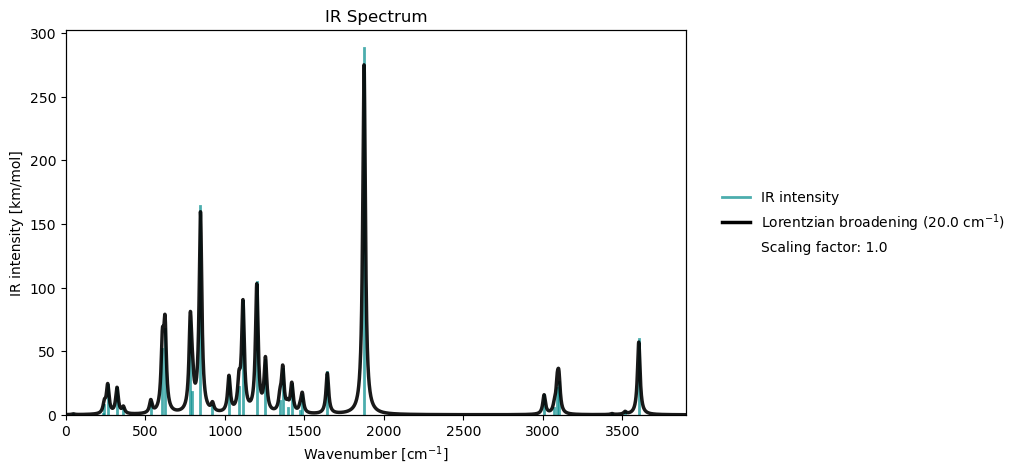

In [16]:
vibanalysis_drv.plot_ir(vib_results)

In [17]:
vibanalysis_drv.animate(vib_results, mode=26)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.